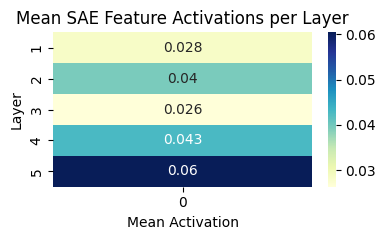

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load SAE activations
with open("saeActvs_by_layer_1.pkl", "rb") as f:
    sae_acts = pickle.load(f)

layer_ids = sorted(sae_acts.keys())
mean_activations = []

for layer_id in layer_ids:
    _, _, features = sae_acts[layer_id]
    mean_activations.append(features.mean(dim=0).cpu().numpy())

activation_matrix = np.array([np.mean(f) for f in mean_activations]).reshape(-1, 1)

plt.figure(figsize=(4, len(layer_ids)*0.5))
sns.heatmap(activation_matrix, annot=True, cmap="YlGnBu", yticklabels=layer_ids)
plt.title("Mean SAE Feature Activations per Layer")
plt.xlabel("Mean Activation")
plt.ylabel("Layer")
plt.tight_layout()
plt.show()


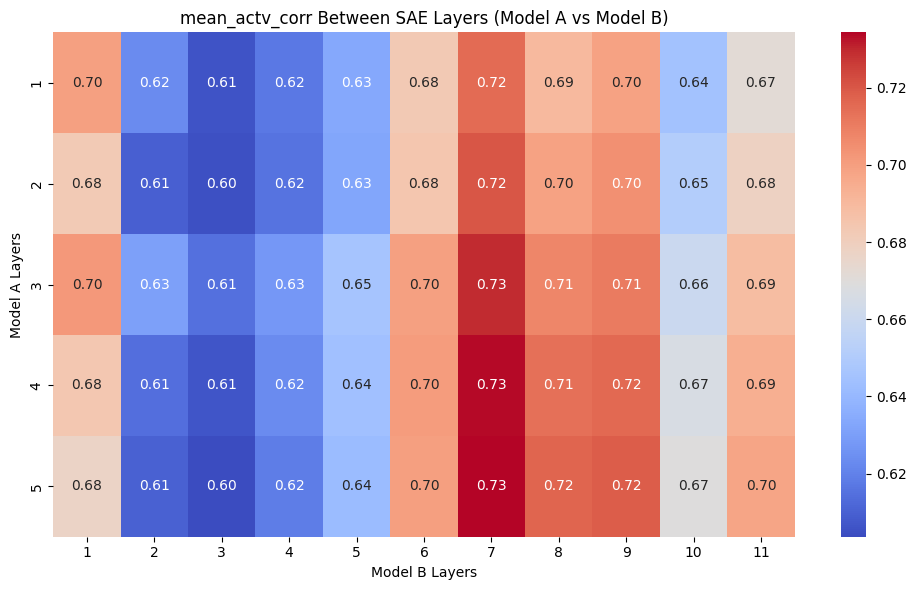

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def load_scores(filepath):
    with open(filepath, "rb") as f:
        return pickle.load(f)

def visualize_score_matrix(scores, metric_name="mean_actv_corr"):
    layer_A_ids = sorted(scores.keys())
    layer_B_ids = sorted(scores[layer_A_ids[0]].keys())

    matrix = np.zeros((len(layer_A_ids), len(layer_B_ids)))

    for i, la in enumerate(layer_A_ids):
        for j, lb in enumerate(layer_B_ids):
            matrix[i, j] = scores[la][lb][metric_name]

    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, xticklabels=layer_B_ids, yticklabels=layer_A_ids,
                annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"{metric_name} Between SAE Layers (Model A vs Model B)")
    plt.xlabel("Model B Layers")
    plt.ylabel("Model A Layers")
    plt.tight_layout()
    plt.show()

# === Run ===
if __name__ == "__main__":
    # Path to your scores file
    filepath = "gemma-scope-2b-pt-res-canonical_gemma-scope-9b-pt-res-canonical_multL_scores.pkl"
    
    # Load and visualize
    scores = load_scores(filepath)

    # Try different metrics here:
    visualize_score_matrix(scores, "mean_actv_corr")

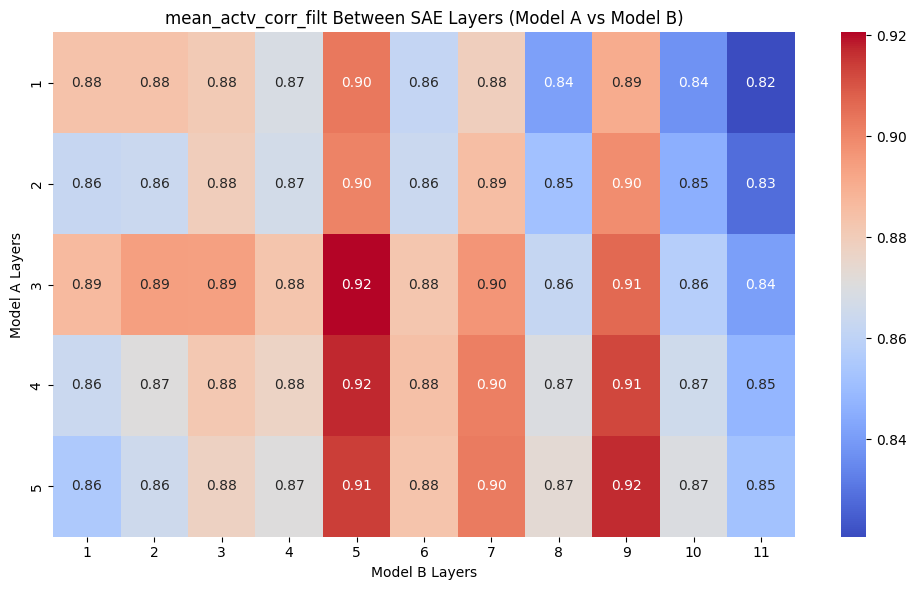

In [5]:
visualize_score_matrix(scores, "mean_actv_corr_filt")

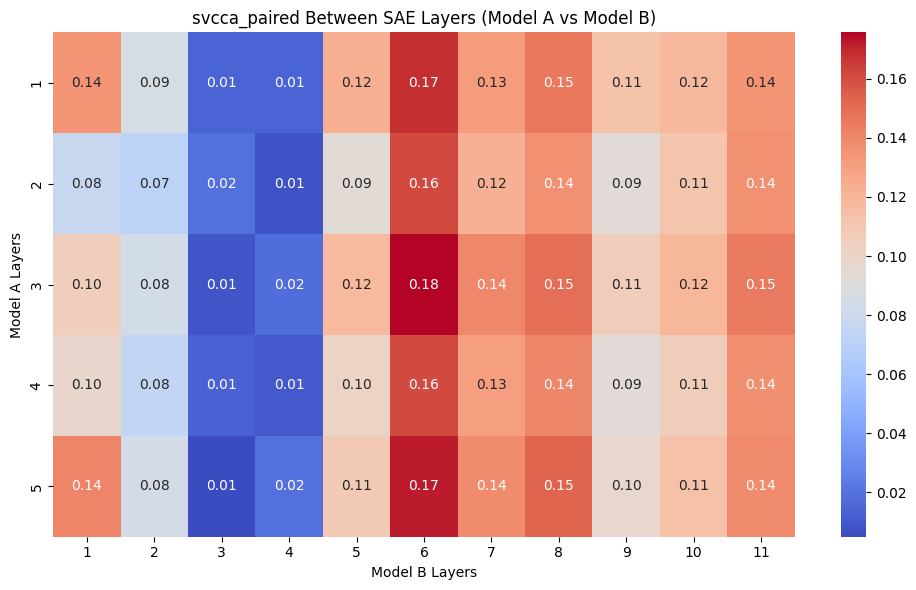

In [6]:
visualize_score_matrix(scores, "svcca_paired")